## Load Dataset 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as scikit_learn

In [12]:
csv_path = "/Users/saifmohammed/Desktop/DiabetIQ/ML/Test/Copy Dataset/Diabetes_Final_Data_V2 copy.csv"
df = pd.read_csv(csv_path)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [14]:
df.shape

(5437, 15)

In [16]:
df.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

In [18]:
df[df.duplicated()]

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic


## Outliers

<Axes: xlabel='age'>

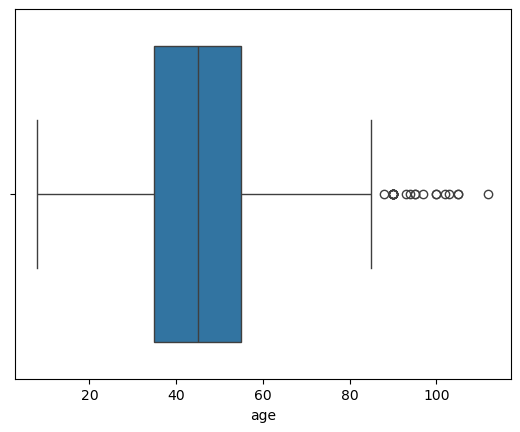

In [21]:
sns.boxplot(x=df['age'])

In [23]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter the outlier values in the 'age' column
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Display the outlier values
outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
360,90,Female,60,222,111,7.58,1.60,58.2,22.73,0,1,0,0,0,No
404,90,Male,68,180,76,8.44,1.65,70.3,25.79,0,1,0,1,0,No
487,97,Male,121,143,88,8.68,1.55,49.4,20.58,0,0,0,0,0,No
633,94,Female,81,187,86,5.12,1.32,24.5,14.04,0,0,0,0,0,No
713,105,Male,78,160,85,9.77,1.63,45.0,17.03,0,0,0,0,0,No
768,90,Male,63,132,59,7.77,1.52,48.0,20.67,0,0,0,0,0,No
887,90,Male,93,179,95,6.40,1.47,25.5,11.75,0,0,0,0,0,No
1250,95,Male,71,148,75,7.20,1.60,65.8,25.70,0,0,0,0,0,No
1769,105,Female,90,153,77,8.64,1.47,36.0,16.59,0,0,0,0,0,No
1862,93,Male,79,110,67,8.32,1.65,58.0,21.28,0,0,0,0,0,No


In [25]:
# Filter the non-outlier values in the 'age' column
non_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Display the non-outlier values
non_outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [27]:
non_outliers.shape

(5414, 15)

<Axes: xlabel='age'>

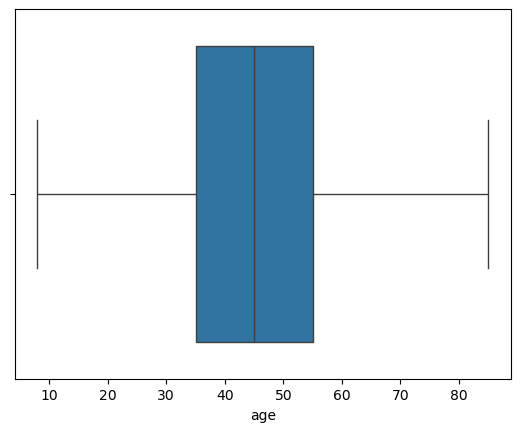

In [29]:
df = non_outliers
sns.boxplot(x=df['age'])

In [31]:
df['diabetic'].value_counts()

diabetic
No     5070
Yes     344
Name: count, dtype: int64

In [33]:
df['gender'].value_counts()

gender
Female    3849
Male      1565
Name: count, dtype: int64

## Categorical Data Handling

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5414 non-null   int64  
 1   gender                  5414 non-null   object 
 2   pulse_rate              5414 non-null   int64  
 3   systolic_bp             5414 non-null   int64  
 4   diastolic_bp            5414 non-null   int64  
 5   glucose                 5414 non-null   float64
 6   height                  5414 non-null   float64
 7   weight                  5414 non-null   float64
 8   bmi                     5414 non-null   float64
 9   family_diabetes         5414 non-null   int64  
 10  hypertensive            5414 non-null   int64  
 11  family_hypertension     5414 non-null   int64  
 12  cardiovascular_disease  5414 non-null   int64  
 13  stroke                  5414 non-null   int64  
 14  diabetic                5414 non-null   objec

In [38]:
# Ensure you're modifying the original dataframe
df = df.copy()

df['gender'] = df['gender'].astype('category')
df['diabetic'] = df['diabetic'].astype('category')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     5414 non-null   int64   
 1   gender                  5414 non-null   category
 2   pulse_rate              5414 non-null   int64   
 3   systolic_bp             5414 non-null   int64   
 4   diastolic_bp            5414 non-null   int64   
 5   glucose                 5414 non-null   float64 
 6   height                  5414 non-null   float64 
 7   weight                  5414 non-null   float64 
 8   bmi                     5414 non-null   float64 
 9   family_diabetes         5414 non-null   int64   
 10  hypertensive            5414 non-null   int64   
 11  family_hypertension     5414 non-null   int64   
 12  cardiovascular_disease  5414 non-null   int64   
 13  stroke                  5414 non-null   int64   
 14  diabetic                5414 

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['diabetic'] = le.fit_transform(df['diabetic'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5414 non-null   int64  
 1   gender                  5414 non-null   int64  
 2   pulse_rate              5414 non-null   int64  
 3   systolic_bp             5414 non-null   int64  
 4   diastolic_bp            5414 non-null   int64  
 5   glucose                 5414 non-null   float64
 6   height                  5414 non-null   float64
 7   weight                  5414 non-null   float64
 8   bmi                     5414 non-null   float64
 9   family_diabetes         5414 non-null   int64  
 10  hypertensive            5414 non-null   int64  
 11  family_hypertension     5414 non-null   int64  
 12  cardiovascular_disease  5414 non-null   int64  
 13  stroke                  5414 non-null   int64  
 14  diabetic                5414 non-null   int64

In [46]:
from sklearn.utils import shuffle
df = shuffle(df)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
3092,35,1,75,167,95,7.59,1.55,59.1,24.62,0,0,0,0,0,0
3093,42,1,80,120,77,9.27,1.68,59.7,21.24,0,0,0,0,0,0
1230,30,0,80,117,71,6.43,1.47,42.0,19.35,0,0,0,0,0,0
5430,58,0,67,141,76,6.25,1.57,62.0,25.00,0,0,0,0,0,0
2561,45,0,84,88,66,7.97,1.52,50.3,21.66,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,30,0,85,100,69,8.70,1.60,57.0,22.26,0,0,0,0,0,0
4346,70,1,65,144,82,5.41,1.60,65.3,25.50,0,1,0,0,0,0
682,45,1,58,136,76,6.87,1.68,54.0,19.21,0,0,0,0,0,0
4396,65,0,90,105,62,8.41,1.55,68.0,28.33,0,0,0,0,0,0


In [48]:
df = df.reset_index()
df

,index,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,3092,35,1,75,167,95,7.59,1.55,59.1,24.62,0,0,0,0,0,0
1,3093,42,1,80,120,77,9.27,1.68,59.7,21.24,0,0,0,0,0,0
2,1230,30,0,80,117,71,6.43,1.47,42.0,19.35,0,0,0,0,0,0
3,5430,58,0,67,141,76,6.25,1.57,62.0,25.00,0,0,0,0,0,0
4,2561,45,0,84,88,66,7.97,1.52,50.3,21.66,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,4279,30,0,85,100,69,8.70,1.60,57.0,22.26,0,0,0,0,0,0
5410,4346,70,1,65,144,82,5.41,1.60,65.3,25.50,0,1,0,0,0,0
5411,682,45,1,58,136,76,6.87,1.68,54.0,19.21,0,0,0,0,0,0
5412,4396,65,0,90,105,62,8.41,1.55,68.0,28.33,0,0,0,0,0,0


In [50]:
x = df.drop('diabetic', axis=1)
y = df['diabetic']

In [52]:
x.columns

Index(['index', 'age', 'gender', 'pulse_rate', 'systolic_bp', 'diastolic_bp',
       'glucose', 'height', 'weight', 'bmi', 'family_diabetes', 'hypertensive',
       'family_hypertension', 'cardiovascular_disease', 'stroke'],
      dtype='object')

In [54]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5409    0
5410    0
5411    0
5412    0
5413    1
Name: diabetic, Length: 5414, dtype: int64

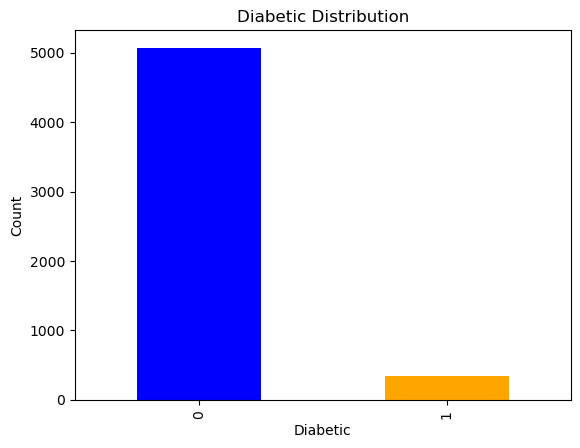

In [56]:
y.value_counts().plot(kind = 'bar', color = ['blue', 'orange']) 
plt.title('Diabetic Distribution')
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.show()

In [58]:
class_counts = y.value_counts()
class_counts

diabetic
0    5070
1     344
Name: count, dtype: int64

In [60]:
# Calculate total count
total = class_counts.sum()

# Calculate percentages
percentages = (class_counts / total) * 100
percentages

diabetic
0    93.646103
1     6.353897
Name: count, dtype: float64

## Train-Test Split

In [63]:
from sklearn.model_selection import train_test_split

# Split the data with stratified sampling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("x_train data size", len(x_train))
print("y_train data size", len(y_train))
print("x_test data size", len(x_test))
print("y_test data size", len(y_test))

x_train data size 4331
y_train data size 4331
x_test data size 1083
y_test data size 1083


## Standard Normal Distribution

In [66]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
std_scaler = StandardScaler()
std_scaled_x_train = std_scaler.fit_transform(x_train)
std_scaled_x_test = std_scaler.transform(x_test)

In [68]:
std_scaled_x_train

array([[ 0.98539063, -0.87277606, -0.63623936, ..., -0.20026399,
        -0.1102378 , -0.05486942],
       [-0.55154709,  0.34088823, -0.63623936, ..., -0.20026399,
        -0.1102378 , -0.05486942],
       [-1.72519699,  0.69784831, -0.63623936, ..., -0.20026399,
        -0.1102378 , -0.05486942],
       ...,
       [ 1.05254771, -1.22973615, -0.63623936, ..., -0.20026399,
        -0.1102378 , -0.05486942],
       [-1.27300599, -1.08695212, -0.63623936, ..., -0.20026399,
        -0.1102378 , -0.05486942],
       [-0.5432324 ,  2.12568866, -0.63623936, ..., -0.20026399,
        -0.1102378 , -0.05486942]])

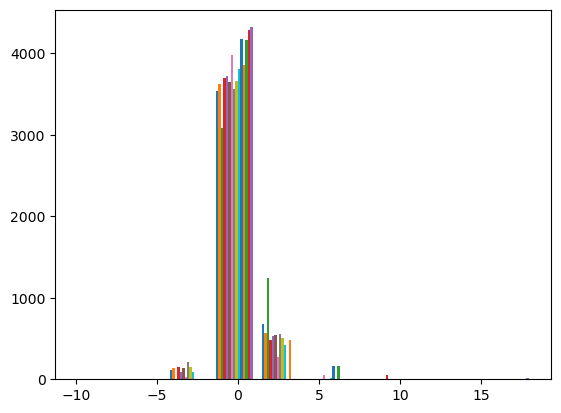

In [70]:
plt.hist(std_scaled_x_train)
plt.show()

## Imblance Dataset Handling with Synthetic Minority Over-Sampling Technique (SMOTE)

In [73]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy=0.7, random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(std_scaled_x_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({0: 4056, 1: 2839})


## Dicision Tree

In [77]:
from sklearn import tree

# Train the decision tree classifier
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [79]:
# Predict on the test set
dt_pred = dt_clf.predict(std_scaled_x_test)

In [81]:
dt_pred

array([1, 0, 0, ..., 1, 0, 0])

In [83]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

cm = confusion_matrix(y_test, dt_pred)
cm

array([[925,  89],
       [ 43,  26]])

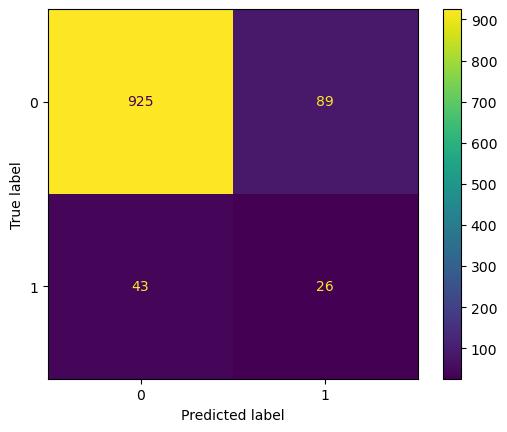

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [87]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.88
Precision: 0.23
F1: 0.28
Recall: 0.38


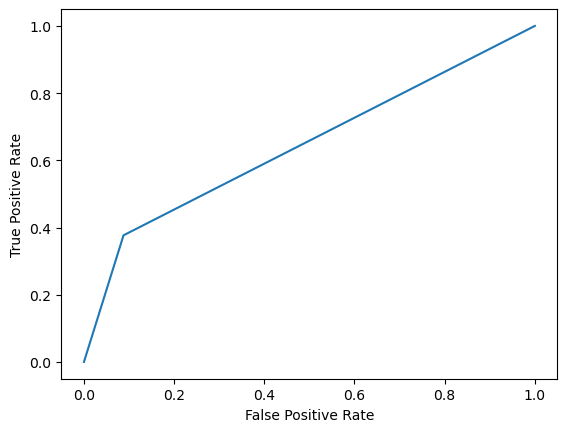

In [89]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, dt_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [91]:
from sklearn.metrics import auc

auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.64


## Hyperparameter Tuning (Decision Tree)

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 50, 100],
    'min_samples_split': [5, 10, 15, 20, 25]
}
dt_clf = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100],
                         'min_samples_split': [5, 10, 15, 20, 25]},
             verbose=2)

In [95]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 100, 'min_samples_split': 5}


In [98]:
best_dt_clf = grid_search.best_estimator_
best_dt_clf

DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_split=5)

In [100]:
dt_pred = best_dt_clf.predict(std_scaled_x_test)

accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.87
Precision: 0.20
F1: 0.25
Recall: 0.33


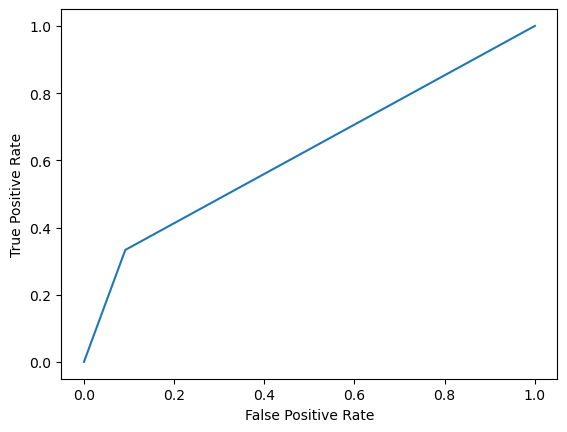

In [102]:
fpr, tpr, _ = roc_curve(y_test, dt_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [104]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.62


## Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [109]:
# Predict on the test set
rf_pred = rf_clf.predict(std_scaled_x_test)
rf_pred

array([1, 0, 1, ..., 0, 0, 0])

In [111]:
cm = confusion_matrix(y_test, rf_pred)
cm

array([[977,  37],
       [ 46,  23]])

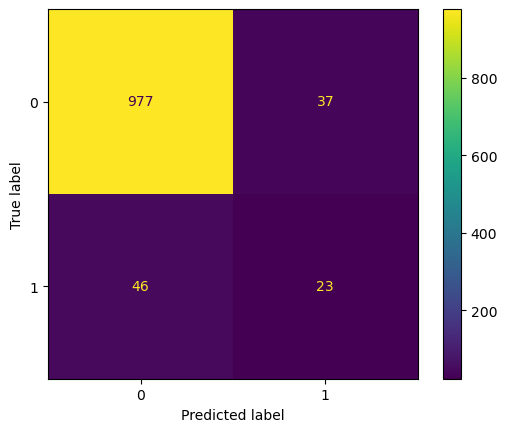

In [113]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [115]:
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.92
Precision: 0.38
F1: 0.36
Recall: 0.33


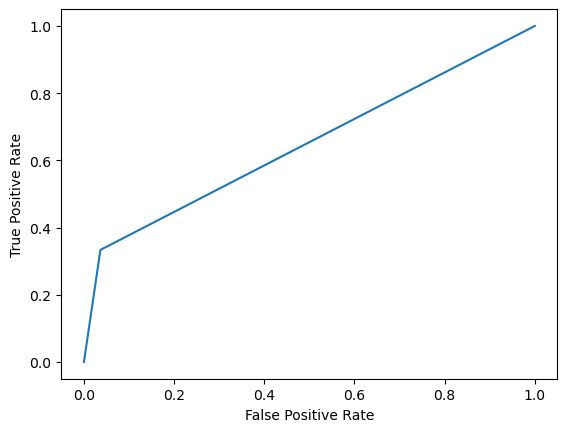

In [117]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [119]:
auc_score_1 = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score_1:.2f}')

Area under the curve (AUC)= 0.65


## Hyperparameter Tuning (Random Forest)

In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 50, 100],
    'min_samples_split': [5, 10, 15, 20, 25]
}
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100],
                         'min_samples_split': [5, 10, 15, 20, 25]},
             verbose=2)

In [136]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 5}


In [138]:
best_rf_clf = grid_search.best_estimator_
best_rf_clf

RandomForestClassifier(max_depth=50, min_samples_split=5)

In [140]:
rf_pred = best_rf_clf.predict(std_scaled_x_test)

accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.92
Precision: 0.37
F1: 0.35
Recall: 0.33


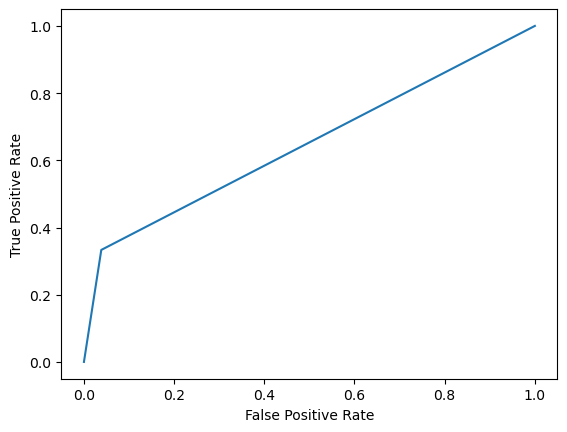

In [142]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [144]:
auc_score_1 = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score_1:.2f}')

Area under the curve (AUC)= 0.65


## XGboost

In [155]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [157]:
xgb_pred = xgb_clf.predict(std_scaled_x_test)
xgb_pred

array([1, 0, 1, ..., 0, 1, 0])

In [159]:
cm = confusion_matrix(y_test, xgb_pred)
cm

array([[978,  36],
       [ 47,  22]])

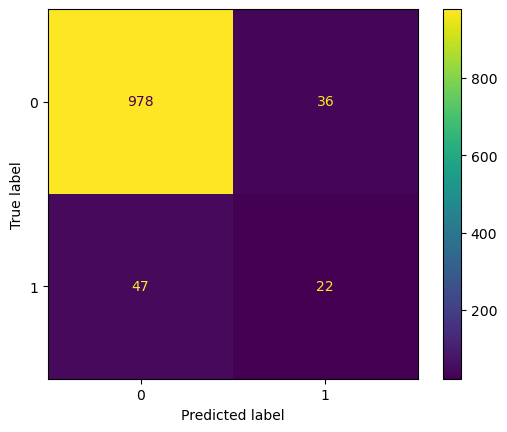

In [161]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [163]:
accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
recall = recall_score(y_test, xgb_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.92
Precision: 0.38
F1: 0.35
Recall: 0.32


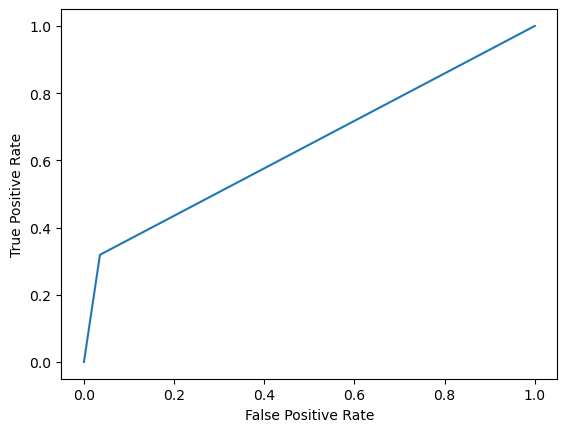

In [165]:
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [526]:
auc_score_1 = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score_1:.2f}')

Area under the curve (AUC)= 0.65


In [528]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [530]:
knn_pred = knn.predict(std_scaled_x_test)
knn_pred

array([0, 0, 0, ..., 1, 0, 0])

In [532]:
cm = confusion_matrix(y_test, knn_pred)
cm

array([[880, 134],
       [ 26,  43]])

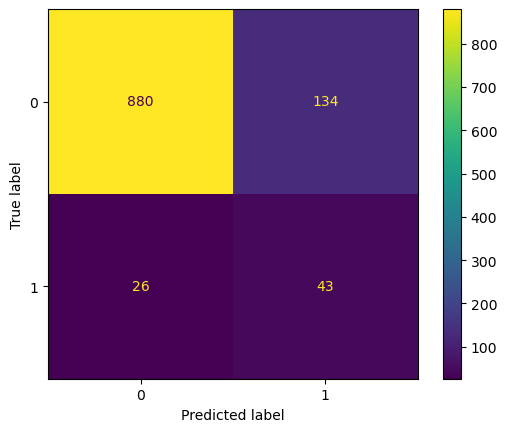

In [534]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [536]:
accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.85
Precision: 0.24
F1: 0.35
Recall: 0.62


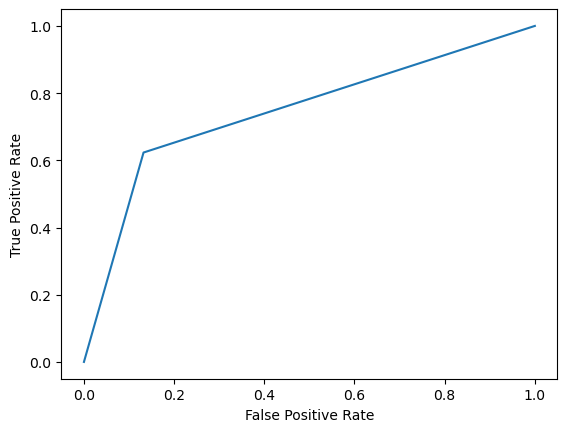

In [538]:
fpr, tpr, _ = roc_curve(y_test, knn_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [540]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.75
